In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
# Membaca dataset
df = pd.read_csv('sentimentdataset.csv')
df

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
727,728,732,Collaborating on a science project that receiv...,Happy,2017-08-18 18:20:00,ScienceProjectSuccessHighSchool,Facebook,#ScienceFairWinner #HighSchoolScience,20.0,39.0,UK,2017,8,18,18
728,729,733,Attending a surprise birthday party organized ...,Happy,2018-06-22 14:15:00,BirthdayPartyJoyHighSchool,Instagram,#SurpriseCelebration #HighSchoolFriendship,25.0,48.0,USA,2018,6,22,14
729,730,734,Successfully fundraising for a school charity ...,Happy,2019-04-05 17:30:00,CharityFundraisingTriumphHighSchool,Twitter,#CommunityGiving #HighSchoolPhilanthropy,22.0,42.0,Canada,2019,4,5,17
730,731,735,"Participating in a multicultural festival, cel...",Happy,2020-02-29 20:45:00,MulticulturalFestivalJoyHighSchool,Facebook,#CulturalCelebration #HighSchoolUnity,21.0,43.0,UK,2020,2,29,20


In [72]:
df.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis=1, inplace=True)
df.head(5)

,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


In [73]:
# Menampilkan informasi dasar
print("Dimensi awal dataset:", df.shape)

Dimensi awal dataset: (732, 13)


In [74]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Text       732 non-null    object 
 1   Sentiment  732 non-null    object 
 2   Timestamp  732 non-null    object 
 3   User       732 non-null    object 
 4   Platform   732 non-null    object 
 5   Hashtags   732 non-null    object 
 6   Retweets   732 non-null    float64
 7   Likes      732 non-null    float64
 8   Country    732 non-null    object 
 9   Year       732 non-null    int64  
 10  Month      732 non-null    int64  
 11  Day        732 non-null    int64  
 12  Hour       732 non-null    int64  
dtypes: float64(2), int64(4), object(7)
memory usage: 74.5+ KB


,Retweets,Likes,Year,Month,Day,Hour
count,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000
mean,21.508197,42.901639,2020.471311,6.122951,15.497268,15.521858
std,7.061286,14.089848,2.802285,3.411763,8.474553,4.113414
min,5.000000,10.000000,2010.000000,1.000000,1.000000,0.000000
25%,17.750000,34.750000,2019.000000,3.000000,9.000000,13.000000
50%,22.000000,43.000000,2021.000000,6.000000,15.000000,16.000000
75%,25.000000,50.000000,2023.000000,9.000000,22.000000,19.000000
max,40.000000,80.000000,2023.000000,12.000000,31.000000,23.000000


In [75]:
# # Mengubah tipe data sesuai spesifikasi
# df["Timestamp"] = pd.to_datetime(df["Timestamp"], format="%Y-%m-%d %H:%M:%S")
# df["Likes"] = df["Likes"].astype(float)
# df["Retweets"] = df["Retweets"].astype(float)
# df["Year"] = df["Year"].astype(int)
# df["Month"] = df["Month"].astype(int)
# df["Day"] = df["Day"].astype(int)
# df["Hour"] = df["Hour"].astype(int)

In [76]:
# Deteksi data duplikat, missing values, dan outliers
duplicates = df.duplicated().sum()
missing_values = df.isnull().sum()
outliers = df[(df["Likes"] > df["Likes"].quantile(0.99)) | (df["Retweets"] > df["Retweets"].quantile(0.99))]

print(f"Total Duplikat: {duplicates}")
print("Missing Values:")
print(missing_values)
print(f"Total Outliers: {len(outliers)}")

Total Duplikat: 20
Missing Values:
Text         0
Sentiment    0
Timestamp    0
User         0
Platform     0
Hashtags     0
Retweets     0
Likes        0
Country      0
Year         0
Month        0
Day          0
Hour         0
dtype: int64
Total Outliers: 0


In [77]:
# # Data Cleaning
# df_cleaned = df.drop_duplicates()
# df_cleaned = df_cleaned.dropna()
# q_low = df_cleaned[["Likes", "Retweets"]].quantile(0.01)
# q_high = df_cleaned[["Likes", "Retweets"]].quantile(0.99)
# df_cleaned = df_cleaned[(df_cleaned["Likes"] >= q_low["Likes"]) & (df_cleaned["Likes"] <= q_high["Likes"]) &
#                          (df_cleaned["Retweets"] >= q_low["Retweets"]) & (df_cleaned["Retweets"] <= q_high["Retweets"]) ]

In [78]:
# Menyimpan dataset cleaned
df_cleaned.to_csv("sentimentdataset_cleaned.csv", index=False)

In [79]:
# Membandingkan data sebelum dan sesudah cleaning
print("Dataset setelah cleaning:")
print(df_cleaned.info())

Dataset setelah cleaning:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 710 entries, 0 to 731
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Text       710 non-null    object 
 1   Sentiment  710 non-null    object 
 2   Timestamp  710 non-null    object 
 3   User       710 non-null    object 
 4   Platform   710 non-null    object 
 5   Hashtags   710 non-null    object 
 6   Retweets   710 non-null    float64
 7   Likes      710 non-null    float64
 8   Country    710 non-null    object 
 9   Year       710 non-null    int64  
 10  Month      710 non-null    int64  
 11  Day        710 non-null    int64  
 12  Hour       710 non-null    int64  
dtypes: float64(2), int64(4), object(7)
memory usage: 77.7+ KB
None


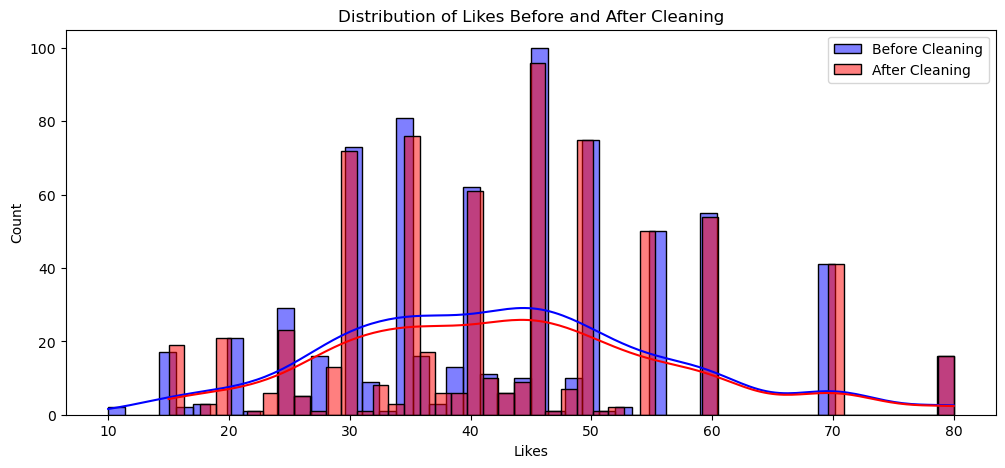

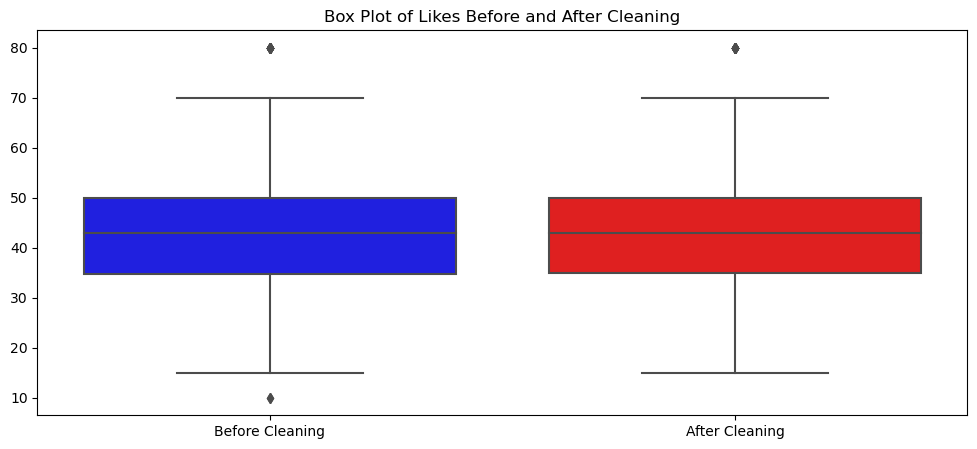

In [80]:
# Visualisasi Histogram dan Box Plot
plt.figure(figsize=(12, 5))
sns.histplot(df["Likes"], bins=50, color="blue", label="Before Cleaning", kde=True)
sns.histplot(df_cleaned["Likes"], bins=50, color="red", label="After Cleaning", kde=True)
plt.legend()
plt.title("Distribution of Likes Before and After Cleaning")
plt.show()

plt.figure(figsize=(12, 5))
sns.boxplot(data=[df["Likes"], df_cleaned["Likes"]], palette=["blue", "red"])
plt.xticks([0, 1], ["Before Cleaning", "After Cleaning"])
plt.title("Box Plot of Likes Before and After Cleaning")
plt.show()

In [81]:
# Statistik
total_users = df_cleaned["User"].nunique()
total_countries = df_cleaned["Country"].nunique()
total_retweets = df_cleaned["Retweets"].sum()
total_likes = df_cleaned["Likes"].sum()

print(f"Total Users: {total_users}")
print(f"Total Countries: {total_countries}")
print(f"Total Retweets: {total_retweets}")
print(f"Total Likes: {total_likes}")

Total Users: 683
Total Countries: 115
Total Retweets: 15328.0
Total Likes: 30572.0


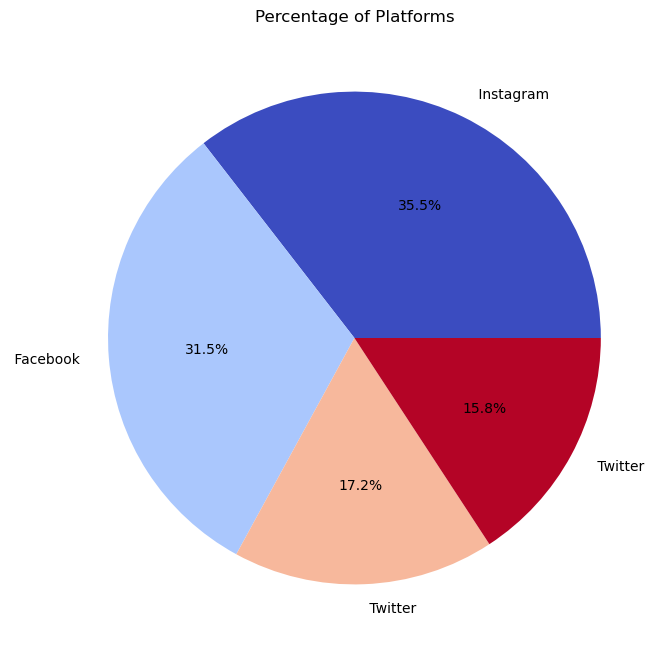

In [82]:
# Pie Chart - Percentages of Platforms
plt.figure(figsize=(8, 8))
df_cleaned["Platform"].value_counts().plot.pie(autopct="%1.1f%%", cmap="coolwarm")
plt.title("Percentage of Platforms")
plt.ylabel("")
plt.show()

In [83]:
# # # Bar Chart - Type of Sentiments
# plt.figure(figsize=(10, 5))
# sns.countplot(data=df_cleaned, x="Sentiment", palette="viridis")
# plt.title("Type of Sentiments")
# plt.xlabel("Sentiment")
# plt.ylabel("Count")
# plt.show()

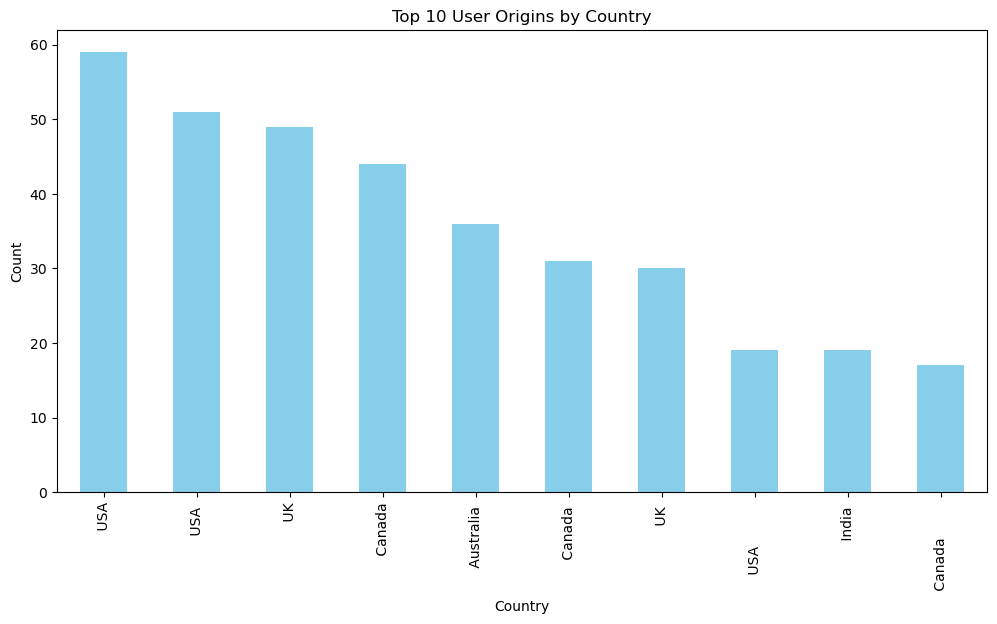

In [84]:
# Bar Chart - Users By Country Origins
plt.figure(figsize=(12, 6))
df_cleaned["Country"].value_counts().nlargest(10).plot(kind="bar", color="skyblue")
plt.title("Top 10 User Origins by Country")
plt.xlabel("Country")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

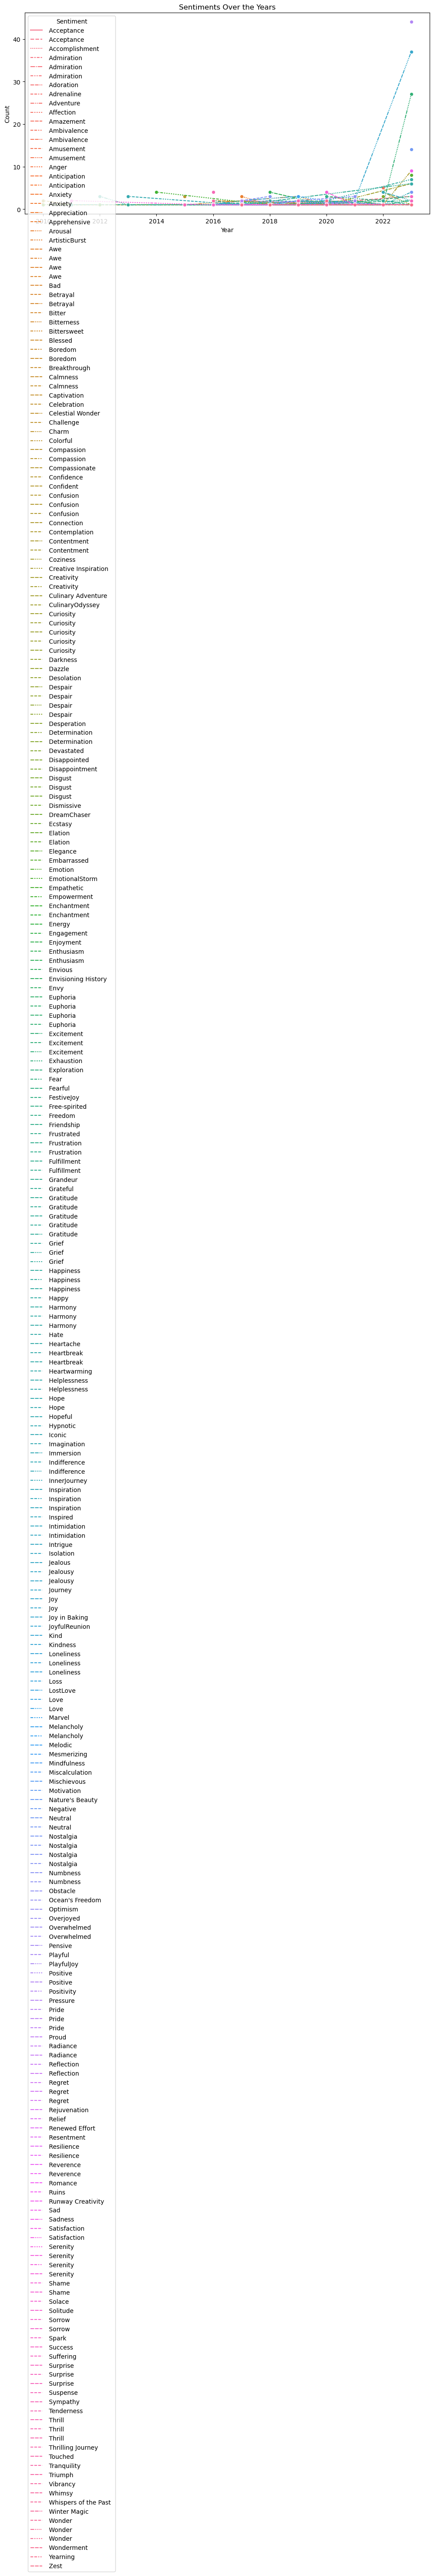

In [85]:
# # Line Chart - Sentiments By Year
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_cleaned.groupby("Year")["Sentiment"].value_counts().unstack(), marker="o")
plt.title("Sentiments Over the Years")
plt.xlabel("Year")
plt.ylabel("Count")
plt.legend(title="Sentiment")
plt.show()